In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("../derrom/")


import derrom

In [2]:
trajectories = derrom.utils.load_trajectories(filename='../../trajectories_n_kmax=200.npz')

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

test_trajectory = derrom.utils.load_trajectories(filename='../../example_trajectory.npz')[0]
print('example trajectory loaded with shape: ', test_trajectory.shape)

1000 loaded with n_kmax = 200
example trajectory loaded with shape:  (400, 200)


In [18]:
import random

n_train_traj = [10,20,50,100,200,500,1000]
# n_train_traj = [10]

scores_list = []

for n in n_train_traj:
    
    print('training set size:', n)
    
    batches = n_trajectories//n
    
    print('number of batches:', batches)
    
    tmp_scores = []
    
    for b in range(batches):
        
#         train_traj = random.sample(trajectories,n)
        train_traj = trajectories[b*n:(b+1)*n]

        dim_reducer = derrom.dim_reducers.SVD()

        scaler = derrom.scalers.normalize_scaler(0.1)
#         scaler = derrom.scalers.standardize_scaler(1.0)

        transformer = derrom.transformers.polynomial_features(order=2)
#         transformer = derrom.transformers.ELM_features(ELM_nodes=400)

        optimizer = derrom.optimizers.ridge(alpha=10.**-2.0)

        model = derrom.derrom(train_traj, 'AR', DE_l=2, intercept=True, full_hist=False,
                              optimizer=optimizer,
                              scaler=scaler,
                              dim_reducer=dim_reducer,
                              NL_transformer=transformer)

        train_kwargs = {'rdim':15}

        scores = derrom.utils.get_KFold_CV_scores(model, train_traj, folds=10, seed=817, norms=['rms','max'], train_kwargs=train_kwargs)

        print('rms error: ', str(np.mean(scores[0])) + ' +- ' + str(np.std(scores[0])) )
        print('max error: ', str(np.mean(scores[1])) + ' +- ' + str(np.std(scores[1])) )
        
        tmp_scores.append(np.asarray(scores))

    tmp_scores = np.concatenate(tmp_scores,axis=1)
    print(tmp_scores.shape)
    
    scores_list.append(tmp_scores)

training set size: 10
number of batches: 100
rms error:  0.044712150513472805 +- 0.023359602236187146
max error:  0.1168158243893775 +- 0.04431159656842971
rms error:  0.08137592892513476 +- 0.026888581640215712
max error:  0.20831954594918542 +- 0.06807802039334515
rms error:  0.07081679622852116 +- 0.05336568478869531
max error:  0.15960822986546183 +- 0.09888751039760973
rms error:  0.05310536448032684 +- 0.03134382861829268
max error:  0.14404986169621767 +- 0.05418617708495107
rms error:  0.05912496557199658 +- 0.028073297196514514
max error:  0.17769223446464905 +- 0.07740651836897848
rms error:  0.05745359696598511 +- 0.024072486922897863
max error:  0.15541020620120624 +- 0.032950908470435164
rms error:  0.06839442529032538 +- 0.05329646888894032
max error:  0.18605966359862763 +- 0.09197424079758372
rms error:  0.06544935834218132 +- 0.052556031009315614
max error:  0.16656588089760374 +- 0.14220266680628005
rms error:  0.054059812085030655 +- 0.037476877864148966
max error:  

rms error:  0.06065610627054281 +- 0.04069229228456347
max error:  0.16289542135027196 +- 0.07522557847170872
rms error:  0.04259591335533632 +- 0.024754063295762005
max error:  0.1290866449872347 +- 0.0486481218592249
rms error:  0.05258402358027901 +- 0.02701803385090968
max error:  0.12172523739374633 +- 0.05009452319495308
rms error:  0.06544014183049014 +- 0.02436634297880306
max error:  0.1678125157010292 +- 0.04005615313398854
rms error:  0.048754797781066325 +- 0.01567772763302294
max error:  0.17148902909040423 +- 0.05626188276495362
rms error:  0.050210374755960505 +- 0.038892007758286294
max error:  0.1323383271147299 +- 0.08188040255173033
rms error:  0.055394624100903365 +- 0.0330127112006304
max error:  0.1781931520142246 +- 0.06053063302172343
rms error:  0.048592672479341445 +- 0.020821705026561322
max error:  0.13486001063597178 +- 0.04236694545745001
rms error:  0.06239179223803164 +- 0.037390848546349484
max error:  0.1673753324167651 +- 0.07293660322007835
rms error

rms error:  0.03785889877970331 +- 0.021529680800645466
max error:  0.12417892744284367 +- 0.05954212093847138
rms error:  0.04333825607106497 +- 0.02437156524680843
max error:  0.18226939703422232 +- 0.11255340077359824
(2, 1000)
training set size: 50
number of batches: 20
rms error:  0.028486817256308687 +- 0.016827852479834832
max error:  0.08292452055003904 +- 0.051287493996257386
rms error:  0.02594264912370821 +- 0.017180913855592693
max error:  0.07617448113042175 +- 0.04324740524440668
rms error:  0.025646227606596565 +- 0.01475661456869536
max error:  0.08460568820398827 +- 0.043095619378718385
rms error:  0.023269238364625137 +- 0.01605549664393896
max error:  0.08822862138784916 +- 0.06173718392521874
rms error:  0.0235873629037369 +- 0.012802494896170705
max error:  0.07520875198686663 +- 0.037474629774284805
rms error:  0.026814856703528584 +- 0.013718610751521663
max error:  0.08277569905146441 +- 0.050475296024979965
rms error:  0.026817218337025283 +- 0.0205231420200405

In [19]:
rms_mean = [np.mean(scrs[0]) for scrs in scores_list ]
rms_std  = [np.std(scrs[0]) for scrs in scores_list ]

max_mean = [np.mean(scrs[1]) for scrs in scores_list ]
max_std  = [np.std(scrs[1]) for scrs in scores_list ]

In [9]:
ELM_rms_mean = rms_mean
ELM_rms_std = rms_std

ELM_max_mean = max_mean
ELM_max_std = max_std

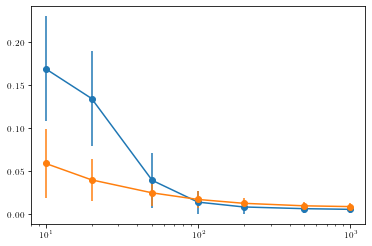

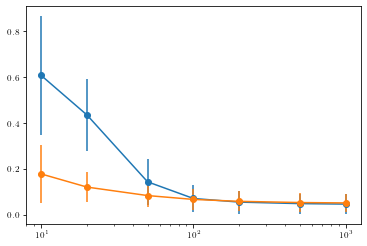

In [20]:
plt.errorbar(n_train_traj, ELM_rms_mean, yerr=ELM_rms_std, marker = 'o', label='ELM')
plt.errorbar(n_train_traj, rms_mean, yerr=rms_std, marker = 'o', label='Poly')
plt.xscale('log')
plt.show()

plt.errorbar(n_train_traj, ELM_max_mean, yerr=ELM_max_std, marker = 'o', label='ELM')
plt.errorbar(n_train_traj, max_mean, yerr=max_std, marker = 'o', label='Poly')
plt.xscale('log')
plt.show()

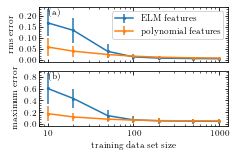

In [23]:
####################################################
####################################################
####################################################

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 9
fig = plt.figure(figsize=(3.40457,2.))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=1, width_ratios=[1], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

# plt.grid()

plt.errorbar(n_train_traj, ELM_rms_mean, yerr=ELM_rms_std, marker = 'o', ms=2, label='ELM features')
plt.errorbar(n_train_traj, rms_mean, yerr=rms_std, marker = 'o', ms=2, label='polynomial features')
plt.xscale('log')

# plt.xlabel(r'training data set size')
plt.ylabel(r'rms error')

plt.legend()

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
ax00.xaxis.set_major_formatter(ticker.NullFormatter())
ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.05, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

# plt.grid()

plt.errorbar(n_train_traj, ELM_max_mean, yerr=ELM_max_std, marker = 'o', ms=2, label='ELM')
plt.errorbar(n_train_traj, max_mean, yerr=max_std, marker = 'o', ms=2)
plt.xscale('log')

plt.xlabel(r'training data set size')
plt.ylabel(r'maximum error')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.FixedLocator([10,100,1000]))
ax00.xaxis.set_major_formatter(ticker.FixedFormatter([10,100,1000]))

# ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.05, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################



plt.tight_layout()

plt.subplots_adjust(left=0.13, bottom=0.16, right=0.9, top=0.99, wspace=0.08, hspace=0.15)


plt.savefig('/home/agluedge/Preprints/ELPH/figs/training_data_dependence.pdf')
plt.show()